# 목차

## 1. Initialization
    # 1.1 초기 정보
        # 1.1.1 게임 제목, 폰트 
        # 1.1.2 플레이 시간 및 FPS 
        # 1.1.3 배경음악
    # 1.2  화면
        # 1.2.1 화면 크기 설정
        # 1.2.2 화면 배경

    # 1.3 캐릭터
        # 1.3.1 캐릭터 생성
        # 1.3.2 캐릭터 초기 위치
        # 1.3.3 캐릭터 이동

    # 1.4 게이트
        # 1.4.1 게이트 종류 
            # 1.4.2 처음 게이트 랜덥 뽑기
        # 1.4.3  게이트 위치, 속도

## 2. 함수 정의
    # 2.1 화면 실시간 업데이트 
    # 2.2 게이트 업데이트
    
## 3. pygame 시작
    # 3.1. 이벤트 처리 (어떤 이벤트가 발생했는지에 따라 좌표의 변경 정도 결정)
    # 3.2 충돌 판정 및 처리 (게이트를 먹거나, Measure를 먹거나)
        # 3.2.1 캐릭터 및 게이트 위치 판정
        # 3.2.2 충돌시 처리 과정         
    # 3.3 게이트가 다 떨어졌을 때 
        
    # 3.4 정보 업데이트 
        # 3.4.1 캐릭터 이동 업데이트 (캐릭터 좌우 x좌표를 업데이트)
        # 3.4.2 게이트 이동 업데이트
        # 3.4.3 타이머 업데이트
    # 3.5. 화면 갱신
  
## 4. pygame 종료

pygame 2.0.0 (SDL 2.0.12, python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html



2022-02-09 19:44:09.115 python[3814:57262] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


Collision!


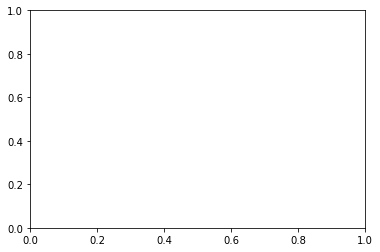

In [1]:
# Shrodinger's Qat game

import pygame
import random
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

# 1. Initialization
pygame.init()

# 1.1 초기 정보
# 1.1.1 게임 제목, 폰트 
pygame.display.set_caption("Shrodinger's Qat")  # 게임 제목
game_font = pygame.font.Font(None,40) # 폰트, 크기
score = 0 # 점수
eat_gate = [] # 먹은 게이트
gate_string = "" # 상단 게이트 표시

# 1.1.2 플레이 시간 및 FPS 
clock = pygame.time.Clock()
dt = clock.tick(40)
totalTime = 0
startTicks = pygame.time.get_ticks()

# 1.1.3 배경음악
test_sound = pygame.mixer.Sound("resource/music/Horizon.mp3")
test_sound.play(-1)



# 1.2  화면
# 1.2.1 화면 크기 설정
screenWidth = 1000 # 가로크기
screenHeight = 700 # 세로크기
screen = pygame.display.set_mode((screenWidth,screenHeight))  # 가로, 세로

# 1.2.2 화면 배경
background = pygame.image.load("resource/background_images/background.png")
background = pygame.transform.scale(background, (screenWidth, screenHeight))



# 1.3 캐릭터
# 1.3.1 캐릭터 생성
cat_w = 100
cat_h = 100
character = pygame.image.load("resource/cat_layers/cat_stand.png")
character = pygame.transform.scale(character, (cat_w, cat_h))
characterWidth, characterHeight = character.get_rect().size  # img 크기 불러옴

# 1.3.2 캐릭터 초기 위치
characterXpos = (screenWidth / 2) - (characterWidth / 2)
characterYpos = screenHeight - characterHeight

# 1.3.3. 캐릭터 이동
characterSpeed = 1 #캐릭터 이동 속도
toX = 0    # dx 개념



# 1.4 게이트
# 1.4.1 게이트 종류 
gate_w = 100
gate_h = 100
enemyWidth = gate_w
enemyHeight = gate_h

H = pygame.image.load("resource/gate/hgate.png")
H = pygame.transform.scale(H, (gate_w, gate_h))

X = pygame.image.load("resource/gate/xgate.png")
X = pygame.transform.scale(X, (gate_w, gate_h))

M = pygame.image.load("resource/gate/measure.png")
M = pygame.transform.scale(M, (gate_w, gate_h))

gate = [["H", H], ["X",X], ["M", M]]

# 1.4.2 처음 게이트 랜덥 뽑기
gate_n = random.randrange(0, len(gate)) # 임의의 게이트를 뽑기
enemy = gate[gate_n][1]      # 게이트 
gate_kind = gate[gate_n][0]  # 게이트 종류를 문자열로 반환

# 1.4.3  게이트 위치, 속도
enemyXpos = random.randrange(0, int(screenWidth*(0.7933))-enemyWidth) # 게이트 초기 x값
enemyYpos = 0                                           # 게이트 초기 y값 
gate_s = 7     # 게이트 초기 속도
gate_ds = 0.1   # 게이트의 시간당 속도 증분



# 2. 함수 정의
# 2.1 화면 실시간 업데이트 
def graphic_update():
    timer = game_font.render("time : %s sec"%str(int(totalTime + elapsedTime)), True, (0,0,0)) #타이머 표시
    score_s = game_font.render("score : %s"%str(score), True, (0,0,0))
    eat_gate_s = game_font.render("Gates you got : %s"%str(gate_string), True, (0,0,0))

    # (조정된 값으로) 전체 그래픽 출력
    screen.fill((0,0,255))
    screen.blit(background, (0,0)) 
    screen.blit(character, (characterXpos , characterYpos))
    screen.blit(enemy, (enemyXpos , enemyYpos))
    screen.blit(timer, (10,10))
    screen.blit(score_s, (10,30))
    screen.blit(eat_gate_s, (10, 50))

    
    
    # (화면 새로고침)
    pygame.display.update()



# 2.2 게이트 업데이트
def new_gate():

    # (다음번 떨어질 게이트 정하기)
    global gate_n, enemy, gate_kind
    gate_n = random.randrange(0, len(gate))
    enemy = gate[gate_n][1]
    gate_kind = gate[gate_n][0]
        
    # (새로운 게이트 위치 설정)
    global enemyXpos, enemyYpos
    enemyXpos = random.randrange(0, int(screenWidth*0.7933)-enemyWidth)
    enemyYpos = 0
    
    # (게이트 점수 업데이트)
    global score
    score += 1
    
    # (게이트 속도 업데이트)
    global gate_s
    gate_s += gate_ds
    

    
# 3. pygame 시작
running = True  
while running: 
    
    
    # 3.1. 이벤트 처리 (어떤 이벤트가 발생했는지에 따라 좌표의 변경 정도 결정)
    for event in pygame.event.get():
        # (창을 닫으면)
        if event.type == pygame.QUIT:
            running = False
        # (키를 누른 순간에)
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT: # 왼쪽 화살표 키
                toX -= characterSpeed
            if event.key == pygame.K_RIGHT: # 오른쪽 화살표 키
                toX += characterSpeed
        # (키를 떼는 순간에)
        if event.type == pygame.KEYUP:
            if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT: # 왼쪽 화살표 키
                toX = 0
    
    
    
    # 3.2 충돌 판정 및 처리 (게이트를 먹거나, Measure를 먹거나)
    
    # 3.2.1 캐릭터 및 게이트 위치 판정
    characterRect = character.get_rect() # 캐릭터 판정 위치
    characterRect.left = characterXpos
    characterRect.top = characterYpos
    
    enemyRect = enemy.get_rect() # 게이트 판정 위치
    enemyRect.left = enemyXpos
    enemyRect.top = enemyYpos

    # 3.2.2 충돌시 처리 과정
    if characterRect.colliderect(enemyRect): # 충돌이 일어났다면
        
        # (Measure를 먹었을 때)
        if gate_kind == "M":     
            print("Collision!")
            running = False
        
        # (다른 게이트를 먹었을 때)
        else:                    
            # (먹은 게이트를 상단에 표시)
            eat_gate.append(gate_kind)
            gate_string = gate_string + " " + gate_kind

            # bloch_sphere = load_bloch_sphere(gate_string.split(" "))
            # bloch_sphere = pygame.transform.scale(bloch_sphere, (200,200)) 
        
            
            # (새로운 게이트를 상단에 표시
            new_gate()
            
            # (화면 갱신)
            graphic_update()
            
    

    # 3.3 게이트가 다 떨어졌을 때 
    if enemyYpos > screenHeight - enemyHeight:
        new_gate()
        
    
    
    # 3.4 정보 업데이트 
    # 3.4.1 캐릭터 이동 업데이트 (캐릭터 좌우 x좌표를 업데이트)
    characterXpos += toX * dt
    if characterXpos < 0:   # 캐릭터가 화면 밖으로 빠져나가지 않게 조정
        characterXpos = 0
    elif characterXpos > int(screenWidth*(0.7933)) - characterWidth:
        characterXpos = int(screenWidth*(0.7933)) - characterWidth
    # 3.4.2 게이트 이동 업데이트
    enemyYpos += gate_s   # 게이트 y좌표 이동
    # 3.4.3 타이머 업데이트
    elapsedTime = ( pygame.time.get_ticks() ) / 1000  #타이머 업데이트 # 경과시간이 ms 이므로 초단위로 표시 
    
    
    # 3.5. 화면 갱신
    graphic_update()
    
    
# 4. pygame 종료
pygame.quit()